In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itk
from itkwidgets import view
import SimpleITK as sitk
from skimage import img_as_ubyte
from skimage.io import imread, imsave, imshow

In [3]:
input_skeleton = r"D:\Cecile\Results\Stade 4\cARIE STADE 4\skeleton_better.tif"
skeleton_itk = itk.imread(input_skeleton)
#print(skeleton_itk)
input_dm = r"D:\Cecile\Results\Stade 4\cARIE STADE 4\EDT_median6.tif"
dm_itk = itk.imread(input_dm)
#print(dm_itk)

In [4]:
size = itk.size(skeleton_itk)
width = size[0]
height = size[1]
print(width, height)

2064 1396


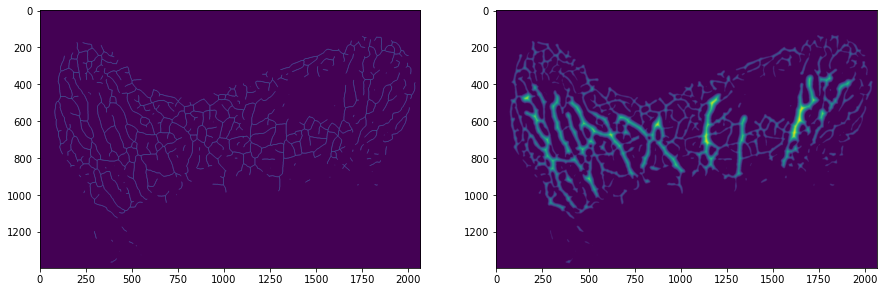

In [5]:
np_view_skeleton = itk.array_view_from_image(skeleton_itk)
np_view_dm = itk.array_view_from_image(dm_itk)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(np_view_skeleton)
plt.subplot(1,2,2)
plt.imshow(np_view_dm)
plt.show()

In [7]:
array_skeleton = itk.array_view_from_image(skeleton_itk)
array_dm = itk.array_view_from_image(dm_itk)
diam = np.zeros((height, width))
array_skeleton = itk.array_view_from_image(skeleton_itk)
print(array_skeleton.shape)
for y in range(height):
    for x in range(width):
            skeleton = array_skeleton[y,x]
            if skeleton != 0:
                diam[y,x] = array_dm[y,x]*1.46               

(1396, 2064)


In [8]:
print(array_dm.max(),array_dm.min())
print(diam.max(),diam.min())
print(diam.shape)

32.01562 0.0
46.39952503204346 0.0
(1396, 2064)


In [9]:
diam_255 = diam*(255/array_dm.max())
#view(diam_255)

In [8]:
print(diam_255.max())

254.60331602720694


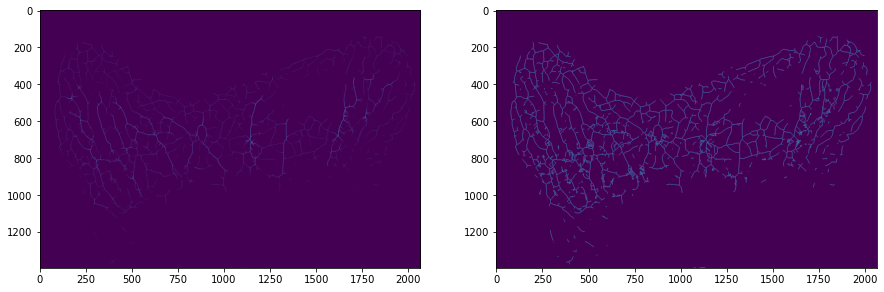

In [9]:
diam_itk = itk.image_from_array(diam)
diam_255_itk = itk.image_from_array(diam_255)

np_view_diam = itk.array_view_from_image(diam_itk)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(diam_255)
plt.subplot(1,2,2)
plt.imshow(np_view_skeleton)
plt.show()

In [10]:
count_diam = 0
for y in range(height):
    for x in range(width):
            diam_intensity = diam[y,x]
            if diam_intensity != 0:
                count_diam = count_diam +1
print(count_diam)

35157


In [11]:
count_skel = 0
for y in range(height):
    for x in range(width):
            skel_intensity = array_skeleton[y,x]
            if skel_intensity != 0:
                count_skel = count_skel+1
print(count_skel)

35157


In [10]:
input_segm = r"D:\Cecile\Results\Stade 4\cARIE STADE 4\mask.tif"
segm_itk = itk.imread(input_segm)
np_view_segm = itk.array_view_from_image(segm_itk)
# plt.figure(figsize=(12,12))
# plt.imshow(np_view_segm)
# plt.show()

In [11]:
array_segm = itk.array_view_from_image(segm_itk)

In [12]:
view(array_segm)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC2; pr…

In [13]:
diam_only = []
for y in range(height):
    for x in range(width):
            if diam[y,x] != 0:
                diam_only.append([y,x])

#print(diam_only)
#print(diam[14,3,11])
print(len(diam_only))
# print(diam_only[2][0])

24446


In [16]:
#Prendre chaque voxel non nul dans la segmentation et lui assigner la valeur du
#voxel le plus proche dans sqeulette avec les valeurs de diamètres

import math

array_diam_segm = np.zeros((height, width))
for y in range(height):
    for x in range(width):
            segm_intensity = array_segm[y,x]
            if segm_intensity != 0:
                dist_min = math.sqrt((height)**2 + (width)**2)
                for k in range (len(diam_only)):
                    dist = math.sqrt((y - diam_only[k][0])**2 + (x - diam_only[k][1])**2)
                    if dist < dist_min:
                        dist_min = dist
                        point_y = diam_only[k][0]
                        point_x = diam_only[k][1]
                print(dist_min, diam[point_y,point_x], "x,y:", x, y)
                array_diam_segm[y,x] = diam[point_y,point_x]
                
#                 dist = itk.EuclideanDistanceMetric[[z,y,x].astype(itk.F)]
#                 #dist = itk.EuclideanDistanceMetric[itk.Vector[itk.F,3]].New([z,y,x])
#                 print(dist.type)
#                 array_segm[z,y,x] = array_dm[min(dist)]

14.866068747318506 9.0 x,y: 1818 132
14.560219778561036 9.0 x,y: 1819 132
14.317821063276353 9.0 x,y: 1820 132
14.142135623730951 9.0 x,y: 1821 132
14.035668847618199 9.0 x,y: 1822 132
14.0 9.0 x,y: 1823 132
7.0710678118654755 5.830951690673828 x,y: 1742 133
7.0 5.830951690673828 x,y: 1743 133
7.0710678118654755 5.830951690673828 x,y: 1744 133
14.317821063276353 9.0 x,y: 1817 133
13.92838827718412 9.0 x,y: 1818 133
13.601470508735444 9.0 x,y: 1819 133
13.341664064126334 9.0 x,y: 1820 133
13.152946437965905 9.0 x,y: 1821 133
13.038404810405298 9.0 x,y: 1822 133
13.0 9.0 x,y: 1823 133
13.0 9.848857879638672 x,y: 1824 133
6.708203932499369 5.830951690673828 x,y: 1740 134
6.324555320336759 5.830951690673828 x,y: 1741 134
6.082762530298219 5.830951690673828 x,y: 1742 134
6.0 5.830951690673828 x,y: 1743 134
6.082762530298219 5.830951690673828 x,y: 1744 134
6.324555320336759 5.830951690673828 x,y: 1745 134
6.708203932499369 5.830951690673828 x,y: 1746 134
13.892443989449804 9.0 x,y: 1816 134


7.0 9.05538558959961 x,y: 1827 139
7.0 8.9442720413208 x,y: 1828 139
7.0 8.5440034866333 x,y: 1829 139
7.0 8.246211051940918 x,y: 1830 139
7.0 8.062257766723633 x,y: 1831 139
7.0 8.0 x,y: 1832 139
7.0 8.0 x,y: 1833 139
7.0 8.0 x,y: 1834 139
7.0710678118654755 8.0 x,y: 1835 139
7.280109889280518 8.0 x,y: 1836 139
7.615773105863909 8.0 x,y: 1837 139
8.0 7.6157732009887695 x,y: 1838 139
8.0 8.062257766723633 x,y: 1839 139
8.0 8.062257766723633 x,y: 1840 139
5.656854249492381 6.4031243324279785 x,y: 1846 139
5.0 6.7082037925720215 x,y: 1847 139
4.242640687119285 6.7082037925720215 x,y: 1848 139
3.605551275463989 6.0 x,y: 1849 139
2.8284271247461903 6.0 x,y: 1850 139
2.23606797749979 6.0 x,y: 1851 139
2.0 6.0 x,y: 1852 139
2.23606797749979 6.0 x,y: 1853 139
2.8284271247461903 6.0 x,y: 1854 139
3.605551275463989 6.0 x,y: 1855 139
4.47213595499958 6.0 x,y: 1856 139
5.385164807134504 6.0 x,y: 1857 139
6.0 5.830951690673828 x,y: 1737 140
5.0 5.830951690673828 x,y: 1738 140
4.0 5.830951690673828

KeyboardInterrupt: 

In [ ]:
#Prendre chaque voxel non nul dans la segmentation et lui assigner la valeur du
#voxel le plus proche dans sqeulette avec les valeurs de diamètres

import math

array_diam_segm = np.zeros((height, width))
maxi = math.ceil(diam.max())
#print(maxi)
for y in range(height):
    for x in range(width):
            segm_intensity = array_segm[y,x]
            if segm_intensity != 0:
                dist_min = math.sqrt((height)**2 + (width)**2)
#                 point_diam = (z,y,x)
                #print("x,y: ", x,y)
                for a in range(-maxi, maxi):
                    for b in range(-maxi, maxi):
                            if (y+a > height-1 or x+b > width-1):
                                break
                            diam_intensity = diam[y+a,x+b]
                            if diam_intensity != 0:
                                dist = math.sqrt((a)**2 + (b)**2)
                                if dist < dist_min:
                                    dist_min = dist
                                    intensity = diam[y+a,x+b]
                                    #print("in:", dist_min, diam[y+a,x+b], [y+a,x+b], [a,b])
                #print("out:" , dist_min, intensity)
                array_diam_segm[y,x] = intensity
                #print(array_diam_segm[y,x], [y,x])

#                 for k in range (len(diam_only)):
#                     dist = math.sqrt((z - diam_only[k][0])**2+(y - diam_only[k][1])**2 + (x - diam_only[k][2])**2)
#                     if dist < dist_min:
#                         dist_min = dist
#                         point_z = diam_only[k][0]
#                         point_y = diam_only[k][1]
#                         point_x = diam_only[k][2]
#                 print(dist_min, point_diam)
#                 print(diam[point_z,point_y,point_x])
#                 array_diam_segm[z,y,x] = diam[point_z,point_y,point_x]

In [26]:
view(array_diam_segm)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD2; pro…

In [ ]:
hess_matrix = itk.HessianRecursiveGaussianImageFilter(skeleton_itk, sigma=2)
for y in range(1863):
    for x in range(516):
            skel_intensity = array_skeleton[y,x]
            if skel_intensity != 0:
                t = hess_matrix.GetPixel([x,y])
                v=itk.FixedArray[itk.D,3]()
                e=itk.Matrix[itk.D,3,3]()
                t.ComputeEigenAnalysis(v,e)
                print("%f,%f,%f"%(v[0],v[1],v[2]))
                arr=itk.GetArrayFromVnlMatrix(e.GetVnlMatrix().as_matrix())
                print(arr)

(50,)


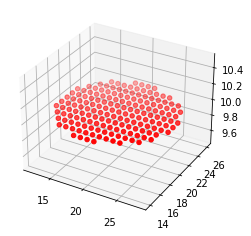

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#creating a 3d numpy array (empty in this example, but will represent a binary 3D image in my application)
space=np.zeros((100,100,50))

r = 8 #radius of the circle
theta = 0 # "tilt" of the circle
phirange = np.linspace(0, 2 * np.pi, 50) #to make a full circle
print(phirange.shape)
alpha = np.pi/4
rrange = np.linspace(0, r, num =10*r)

#center of the circle
center=[20,20,10]

#computing the values of the circle in spherical coordinates and converting them
#back to cartesian
for r in rrange:
    for phi in phirange:
        x =  r* np.cos(phi)*np.cos(theta) + center[0]
        y =  r*np.sin(phi) *np.sin(alpha)+ center[1]
        z =  r* np.cos(phi) *np.sin(theta)*np.cos(alpha)+ center[2]
        space[int(round(x)),int(round(y)),int(round(z))]=1


x,y,z = space.nonzero()

#plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= 'red')
plt.show()

In [84]:
space=np.zeros((100,100,50))
r = 8 #radius of the circle
theta = 0 # "tilt" of the circle
phirange = np.linspace(0, 2 * np.pi, 50) #to make a full circle
print(phirange.shape)
alpha = 0
rrange = np.linspace(0, r, num =10*r)

#center of the circle
center=[20,20,10]

#computing the values of the circle in spherical coordinates and converting them
#back to cartesian
for r in rrange:
    for phi in phirange:
        x =  r* np.cos(phi)*np.cos(theta) + center[0]
        y =  r*np.sin(phi) + center[1]+ r*np.sin(alpha)
        #z =  r* np.cos(phi) *np.sin(theta)+ center[2]+ r*np.cos(alpha)
        z=0
        space[int(round(x)),int(round(y)),int(round(z))]=1


x,y,z = space.nonzero()
view(space)

(50,)


Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [1]:
v1 = np.array([-0.51082782, -0.1698018,  -0.84274687])
v2 =np.array([-0.24471721, -0.91102182,  0.33189267])

space=np.zeros((100,100,50))
r = 8 #radius of the circle
phirange = np.linspace(0, 2 * np.pi, 50) #to make a full circle
print(phirange.shape)
rrange = np.linspace(0, r, num =10*r)

#center of the circle
center=[20,20,10]

#computing the values of the circle in spherical coordinates and converting them
#back to cartesian
for r in rrange:
    for phi in phirange:
        x =  r* np.cos(phi) + center[0]
        y =  r*np.sin(phi) + center[1]
        #z =  r* np.cos(phi)
        z = center[2]
        space[int(round(x)),int(round(y)),int(round(z))]=1
print(space.shape)

x,y,z = space.nonzero()
#plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= 'red')
plt.show()

NameError: name 'np' is not defined

In [7]:
import pandas as pd

array = [['a1', 'a2', 'a3'],
         ['a4', 'a5', 'a6'],
         ['a7', 'a8', 'a9'],
         ['a10', 'a11', 'a12', 'a13', 'a14']]

df = pd.DataFrame(array).T
df.to_excel(excel_writer = r"D:\Cecile\test.xlsx")